### Nama Anggota :
### Dimas Akbar Ferdiansyah
### Juntri parhacian dolok saribu
### Addo Adantya Abiesa

### ITS-04 Kelompok 7


## Prediksi Harga Saham menggunakan machine learning dengan metode Long Short Therm Memory (LSTM)

### Tahap 1: Load Modules

In [278]:
from __future__ import print_function
import os
import math
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.tsa import stattools
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

### Tahap 2: Import data set saham yang akan dianalisis

Disini kita akan menganalisis saham Lippo Karawaci Tbk PT

In [279]:
#Import Data
df = pd.read_csv("LPKR.JK.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-13,710.243042,745.953613,706.275208,745.953613,715.769165,392040170
1,2014-01-15,745.953613,769.760620,741.985779,761.824951,730.998230,307757501
2,2014-01-16,761.824951,777.696289,749.921448,765.792786,734.805542,213343623
3,2014-01-17,761.824951,777.696289,757.857117,765.792786,734.805542,174421548
4,2014-01-20,769.760620,773.728455,761.824951,765.792786,734.805542,98396525
5,2014-01-21,769.760620,777.696289,761.824951,773.728455,742.420105,157218604
6,2014-01-22,773.728455,777.696289,765.792786,773.728455,742.420105,68760866
7,2014-01-23,773.728455,793.567627,773.728455,781.664124,750.034729,204786571
8,2014-01-24,777.696289,781.664124,769.760620,777.696289,746.227356,66397993
9,2014-01-27,769.760620,769.760620,738.017944,738.017944,708.154663,79113733


In [280]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1971,2021-12-06,144.0,146.0,143.0,143.0,143.0,45432800
1972,2021-12-07,144.0,146.0,143.0,146.0,146.0,43997700
1973,2021-12-08,147.0,151.0,146.0,148.0,148.0,74345500
1974,2021-12-09,149.0,151.0,147.0,147.0,147.0,32407200
1975,2021-12-10,148.0,150.0,146.0,148.0,148.0,26537000


In [281]:
df.shape

(1976, 7)

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1976 entries, 0 to 1975
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1976 non-null   object 
 1   Open       1976 non-null   float64
 2   High       1976 non-null   float64
 3   Low        1976 non-null   float64
 4   Close      1976 non-null   float64
 5   Adj Close  1976 non-null   float64
 6   Volume     1976 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 108.2+ KB


In [283]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Tidak ada data yang kosong

In [284]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1976.000000,1976.000000,1976.000000,1976.000000,1976.000000,1.976000e+03
mean,501.234583,510.184443,492.971487,501.351571,492.969600,8.765271e+07
std,301.841335,306.545132,297.599476,302.552745,293.323943,1.003858e+08
min,113.000000,121.000000,113.000000,119.000000,119.000000,0.000000e+00
25%,226.960342,232.000000,222.149208,226.960342,226.960342,3.605770e+07
50%,408.687347,416.623016,400.751678,408.687347,405.403259,6.665500e+07
75%,813.406860,825.310364,805.471191,813.406860,794.554947,1.097905e+08
max,1150.673096,1158.608765,1142.737427,1158.608765,1125.180786,1.587737e+09


In [285]:
data = df[['Date', 'Close']]
data.head(10)

,Date,Close
0,2014-01-13,745.953613
1,2014-01-15,761.824951
2,2014-01-16,765.792786
3,2014-01-17,765.792786
4,2014-01-20,765.792786
5,2014-01-21,773.728455
6,2014-01-22,773.728455
7,2014-01-23,781.664124
8,2014-01-24,777.696289
9,2014-01-27,738.017944


In [286]:
data.index = data['Date'].map(lambda d: pd.to_datetime(d, format = '%Y-%m-%d'))
data.drop('Date',axis=1, inplace=True)
data.head(10)

,Close
Date,
2014-01-13,745.953613
2014-01-15,761.824951
2014-01-16,765.792786
2014-01-17,765.792786
2014-01-20,765.792786
2014-01-21,773.728455
2014-01-22,773.728455
2014-01-23,781.664124
2014-01-24,777.696289


# Visualisasi Data 

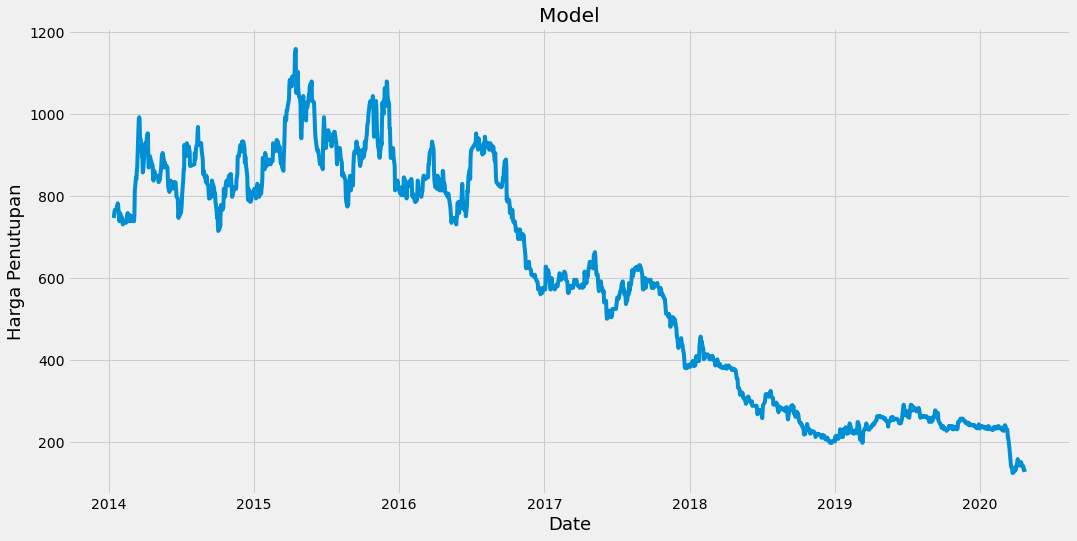

In [287]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Harga Penutupan', fontsize=18)
plt.plot(train['Close'])

In [288]:
data = data.filter(['Close'])
dataset = data.values

#menghitung jumlah baris yang dilatih.
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

1581

In [289]:
#mengukur data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.60306688],
       [0.61833352],
       [0.62215019],
       ...,
       [0.02789511],
       [0.02693321],
       [0.02789511]])

In [290]:
#membuat dataset latih
#membuat scaled dataset
train_data = scaled_data[0:training_data_len , :]
#membagi data ke x_train dan y_train dataset
x_train = []
y_train = []
for i in range(80, len(train_data)):
    x_train.append(train_data[i-80:i, 0])
    y_train.append(train_data[i,0])
    if i<=80:
        print(x_train)
        print(y_train)
        print()

[array([0.60306688, 0.61833352, 0.62215019, 0.62215019, 0.62215019,
       0.62978351, 0.62978351, 0.63741683, 0.63360017, 0.59543356,
       0.59925022, 0.61451686, 0.6107002 , 0.60306688, 0.5916169 ,
       0.58780023, 0.5916169 , 0.59543356, 0.59543356, 0.59543356,
       0.59543356, 0.5916169 , 0.59925022, 0.61451686, 0.60306688,
       0.59543356, 0.59543356, 0.6107002 , 0.60306688, 0.59925022,
       0.59543356, 0.60688354, 0.60306688, 0.59925022, 0.59543356,
       0.59543356, 0.6107002 , 0.66795018, 0.69848347, 0.69466681,
       0.71375017, 0.72138349, 0.75191678, 0.83588345, 0.83970011,
       0.83588345, 0.79390012, 0.79008346, 0.77481681, 0.74810012,
       0.75191678, 0.70993345, 0.71375017, 0.76718343, 0.75955011,
       0.77863347, 0.76718343, 0.79771678, 0.80153344, 0.80153344,
       0.7404668 , 0.72138349, 0.74810012, 0.74428346, 0.73665014,
       0.73665014, 0.72520016, 0.69848347, 0.69085015, 0.70611679,
       0.71375017, 0.69848347, 0.70230013, 0.70230013, 0.7023

In [291]:
#menghubah x_train dan y_train ke dlan numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [292]:
#reshape data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1))
x_train.shape

(1501, 80, 1)

In [293]:
#membangun model LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(1))

In [294]:
#Menyusun model
model.compile(optimizer='adam', loss='mean_squared_error')

In [295]:
#Melatih/Train model 
model.fit(x_train, y_train, batch_size=1, epochs=1)

1501/1501 [==============================] - 37s 23ms/step - loss: 0.0029


In [296]:
#Membuat Testing Dataset
#Membuat New array yang terdiri dari 'scaled dataset' dari indes 1501 sampai dengan 1975
test_data = scaled_data[training_data_len - 80: , :]

#Membentuk dataset x_test dan y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(80, len(test_data)):
    x_test.append(test_data[i-80:i, 0])
    

In [297]:
#Mengubah data ke bentuk numypy array
x_test = np.array(x_test)

In [298]:
#Reshape data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [299]:
#membuat model prediksi harga
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [300]:
#Menampilkan hasil root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

5.761305603799941

Dengan nila RMSE=5.761305603799941, dapat dikatakan tingkat akurasi data cukup baik.

In [302]:
#Menampilkan harga sebenarnya dan harga prediksi
valid

,Close,Predictions
Date,,
2020-04-27,133.0,131.248840
2020-04-28,140.0,129.447311
2020-04-29,149.0,128.708557
2020-04-30,162.0,129.392456
2020-05-04,151.0,131.915680
...,...,...
2021-12-06,143.0,138.824982
2021-12-07,146.0,138.661469
2021-12-08,148.0,138.648346


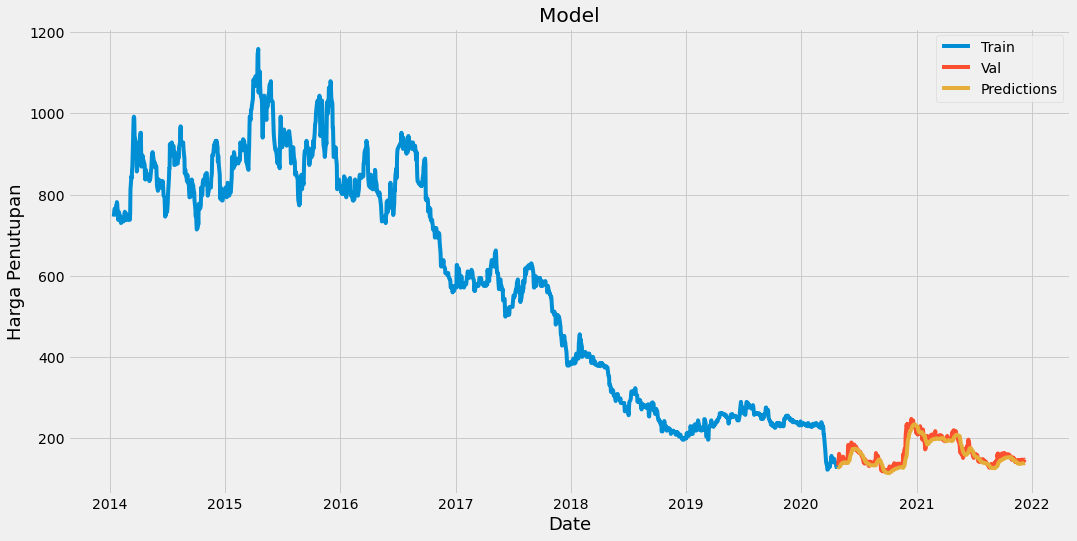

In [303]:
#Melakukan plot Data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Memvisualisasi data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Harga Penutupan', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='upper right')
plt.show()

### Kesimpulan

Dapat dilihat pada plot data tersebut, garis biru menunjukan hasil data model yang dilatih. Warna orange merupakan nilai aktual untuk sisa hari selanjutnya. dan warna kunigng menunjukan adalah predksi yang dihasilkan melalui model yang telah dibuat. 
pada garis orange dan kuning, jaraknya sangat dekat yang mengartikan bahwa model yang dibuat cukup baik untuk melakukan prediksi harga.